In [51]:
#author : Canberk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
data = pd.read_csv("data.csv")

In [53]:
data.drop(["id","Unnamed: 32"],axis = 1, inplace = True)

In [54]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

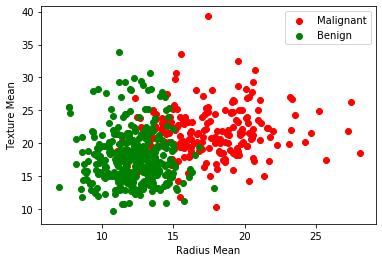

In [55]:
#Scatter Plot
plt.scatter(M.radius_mean,M.texture_mean,color = "red",label = "Malignant")
plt.scatter(B.radius_mean,B.texture_mean,color = "green",label = "Benign")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.legend()
plt.show()

In [56]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"], axis = 1)

In [57]:
#Normalization
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [58]:
#Train-Test Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [59]:
#Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbours is k value
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [60]:
prediction

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0], dtype=int64)

In [61]:
print(" {} knn score: {} ".format(3,knn.score(x_test,y_test)))

 3 knn score: 0.9385964912280702 


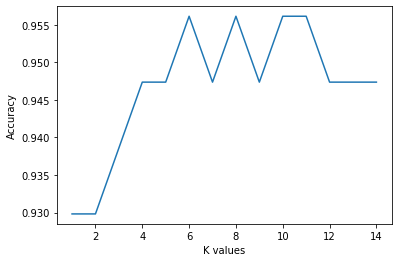

In [63]:
#plot knn with values
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()